In [6]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

#carregando a vgg
vgg_model = vgg16.VGG16(weights='imagenet')

#inceptionv3
inception_model = inception_v3.InceptionV3(weights='imagenet')

#resnet
resnet_model = resnet50.ResNet50(weights='imagenet')

#mobile
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

PIL image size (224, 224)


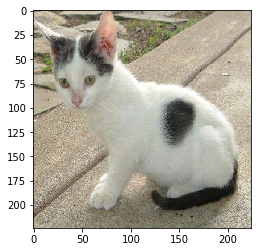

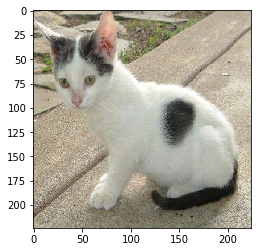

numpy array size (224, 224, 3)
image batch size (1, 224, 224, 3)


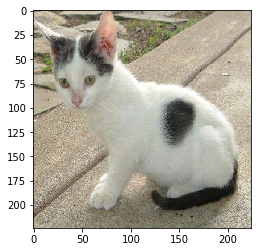

In [7]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt

%matplotlib inline

filename = 'images/cat.jpg'

#load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()

#convert the PIL image to a numpy array
#IN PIL - image is in (width, height, channel)
#In numpy - image is in (width, height, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size', numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the 
# data at a particular axis We want the input matrix 
# to the network to be of the form 
# (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [15]:
# prepare the image for the vgg model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)

# print predictions

# convert the probabilities to class labels
# we will het top 5 preditions which is the default
label = decode_predictions(predictions)
print (label)

[[('n02123597', 'Siamese_cat', 0.31094277), ('n01877812', 'wallaby', 0.078139514), ('n02326432', 'hare', 0.07326403), ('n02325366', 'wood_rabbit', 0.051443476), ('n03223299', 'doormat', 0.049011324)]]
